<a href="https://colab.research.google.com/github/Zenrav/Churn-Prediction/blob/main/Churn_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [9]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender', 'Geography_Spain']
X = df[features]
y = df['Exited']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [11]:
X_train[:5], X_test[:5]

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 9254          686   32       6       0.00              2          1   
 1561          632   42       4  119624.60              2          1   
 1670          559   24       3  114739.92              1          1   
 6087          561   27       9  135637.00              1          1   
 6669          517   56       9  142147.32              1          0   
 
       IsActiveMember  EstimatedSalary  Gender  Geography_Spain  
 9254               1        179093.26       1            False  
 1561               1        195978.86       1            False  
 1670               0         85891.02       1             True  
 6087               0        153080.40       0            False  
 6669               0         39488.04       1            False  ,
       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 6252          596   32       3   96709.07              2          0   
 4684          623   43  

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:5], X_test[:5]

(array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
          0.64920267,  0.97481699,  1.36766974,  0.91324755, -0.57638802],
        [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
          0.64920267,  0.97481699,  1.6612541 ,  0.91324755, -0.57638802],
        [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
          0.64920267, -1.02583358, -0.25280688,  0.91324755,  1.73494238],
        [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
          0.64920267, -1.02583358,  0.91539272, -1.09499335, -0.57638802],
        [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
         -1.54035103, -1.02583358, -1.05960019,  0.91324755, -0.57638802]]),
 array([[-0.57749609, -0.6557859 , -0.69539349,  0.32993735,  0.80843615,
         -1.54035103, -1.02583358, -1.01960511,  0.91324755, -0.57638802],
        [-0.29729735,  0.3900109 , -1.38944225, -1.21847056,  0.80843615,
          0.64920267,  0.97481

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

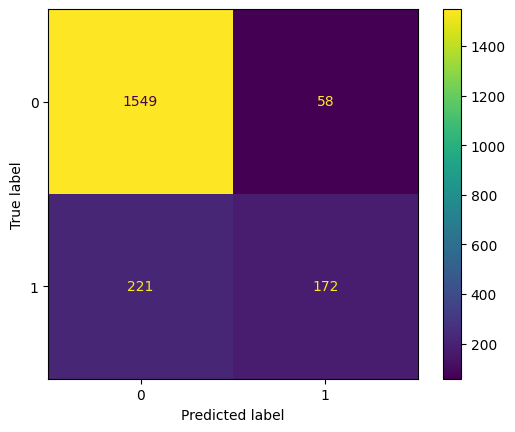

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [18]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1549   58]
 [ 221  172]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

0.8605


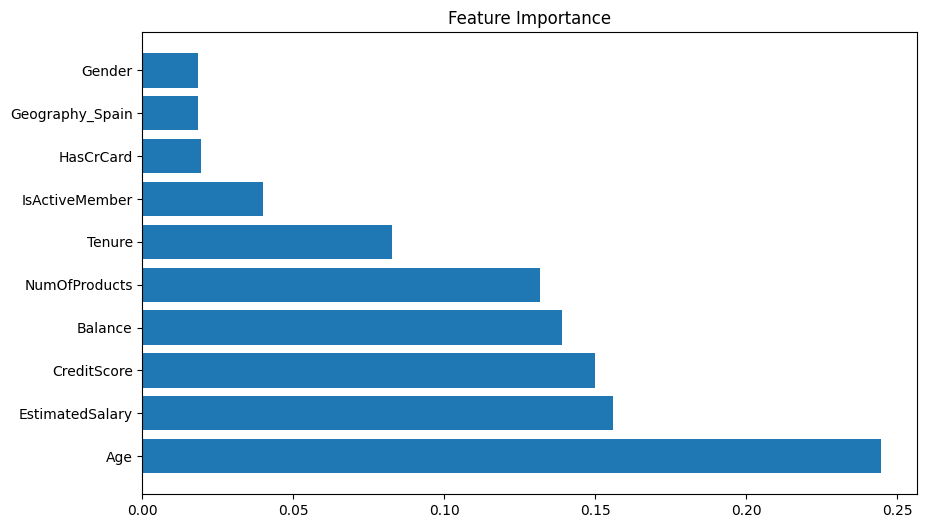

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)




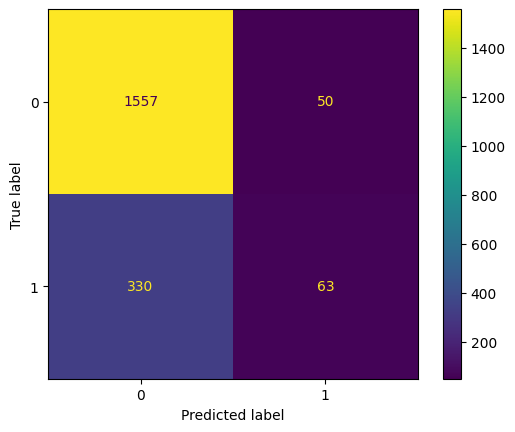

In [21]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg).plot()

In [22]:
print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1557   50]
 [ 330   63]]               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.56      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.77      2000
 0.81


In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


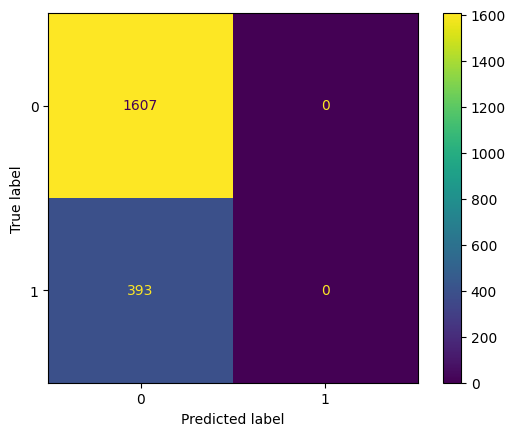

In [24]:
ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm).plot()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


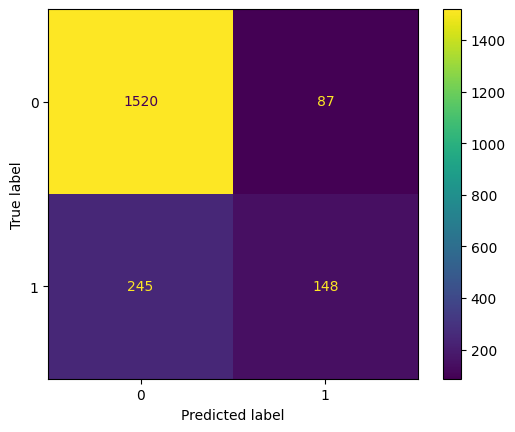

In [26]:
ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn).plot()

In [27]:
print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1520   87]
 [ 245  148]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000
 0.834


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

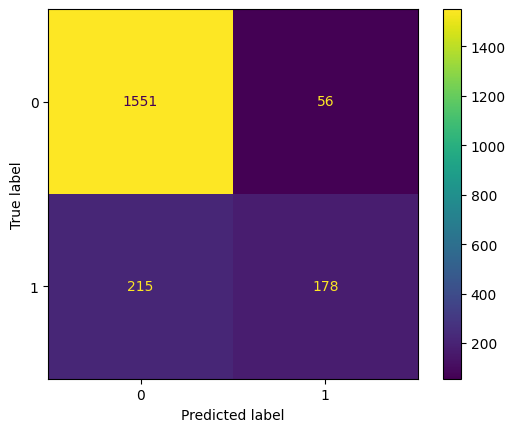

In [29]:
ConfusionMatrixDisplay(confusion_matrix = conf_matrix_gbm).plot()

In [30]:
print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1551   56]
 [ 215  178]]               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000
 0.8645


In [31]:
df = pd.read_csv('Churn_Modelling.csv')
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

df['AgeGroup'] = pd.cut(df['Age'], bins = [18, 25, 35, 45, 55, 65, 75, 85, 95], labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75','76-85', '86-95'])

df['BalanceToSalaryRatio'] = df['Balance']/df['EstimatedSalary']

df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

df['TenureGroup'] = pd.cut(df['Tenure'], bins = [0,2,5,7,10],labels = ['0-2', '3-5', '6-7', '8-10'])

In [32]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [35]:
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage', 'Male_Germany', 'Male_Spain'] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]
X = df[features]
y = df['Exited']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [39]:
print(conf_matrix, class_report, accuracy)

[[1547   60]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.76      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8695
